<a href="https://colab.research.google.com/github/TKLUSSMANN/FoodHubDataAnalysis/blob/main/Klussmann_FoodHubDataAnalysis_PythonFoundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. **They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.** Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Abstract

In this projects, we used NumPy, Pandas, Matplotlib and Seaborn to perform EDA for the food aggregator company. We answered questions ranging from determining the size and statistical summary of our data set (Q1, Q4) to determining the most popular cuisine types and mean delivery time (Q8, Q10). We also looked into the net revenue generated by the company across all orders (Q14). We looked into many other questions as well. We discovered the most popular cuisine types as well as the most popular restaurants (Q7,Q8). We concluded that delivery time is significantly higher on weekdays than weekends (Q12). We determined cuisine preference ties into likelihood of giving different ratings on the app (Q12). We also made many business recommendations based on these conclusions.

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# allows google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reads the data
data = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# gives rows and columns of the dataframe
data.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# provides a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The columns, 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' are all of dataype '**object**'. The columns, 'order_id', 'customer_id', 'food_preparation_time' and 'delivery_time' are all of datatype '**int64**'.  The column, 'cost_of_the_order' is of datatype '**float64**'.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# gives a count of the number of missing values in each column
data.isnull().value_counts()

order_id  customer_id  restaurant_name  cuisine_type  cost_of_the_order  day_of_the_week  rating  food_preparation_time  delivery_time
False     False        False            False         False              False            False   False                  False            1898
dtype: int64

#### Observations: Because the **'isnull'** and **'value_counts'** function returned **'False'** 1898 times for each column and there are 1898 rows, we can conclude that there are no missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# gives a statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: Food Preparation Statistics: Minimum Time = 20 minutes, Average Time = 27.37 minutes, Maximum Time = 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# counts the number of orders that are and are not rated
(data['rating'] == 'Not given').value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations: 736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

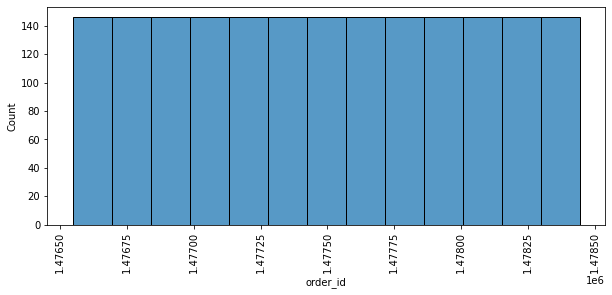

In [ ]:
# plots a histogram of the order id numbers
plt.figure(figsize=(10,4))
sns.histplot(data=data,x='order_id')
plt.xticks(rotation=90)
plt.show()

#### Observations: A histogram of the 'order_id' variable indicates a uniform distribution of order_id ranging from order id #1476547 to order id #1478444


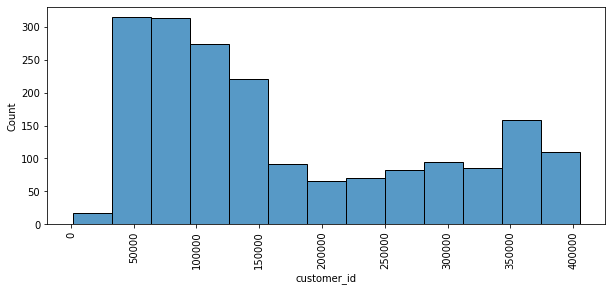

In [ ]:
# plots a histogram of the customer id numbers
plt.figure(figsize=(10,4))
sns.histplot(data=data,x='customer_id')
plt.xticks(rotation=90)
plt.show()

#### Observations: A histogram of the 'customer_id' variable indicates a somewhat bimodal distribution of customer_id ranging from customer id #1311 to customer id #405334



In [ ]:
# imports plotly for use in our graphing
import plotly.express as px

In [ ]:
#plots a histogram of the restaurants and frequency with which each was was used in our data set
his = px.histogram(data, x="restaurant_name")
his.show()




#### Observations: Shake shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken are the most popular restaurants from which people ordered in our data set, respectively

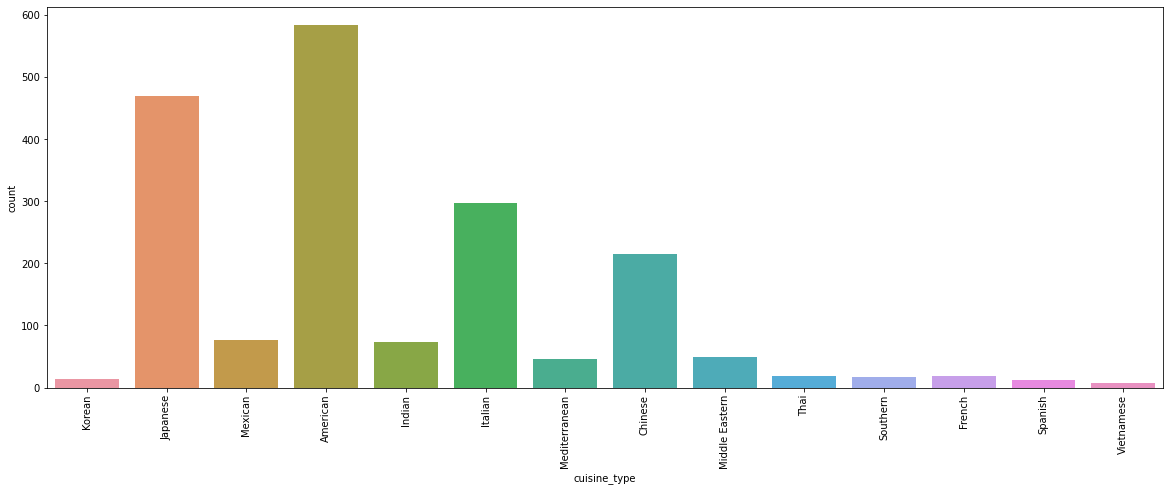

In [ ]:
# plots a bar graph of the various cuisine types in our data set
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='cuisine_type');
plt.xticks(rotation=90);




#### Observations: American, Japanese, Italian and Chinese cuisine types are the most popular in our data set, respectively

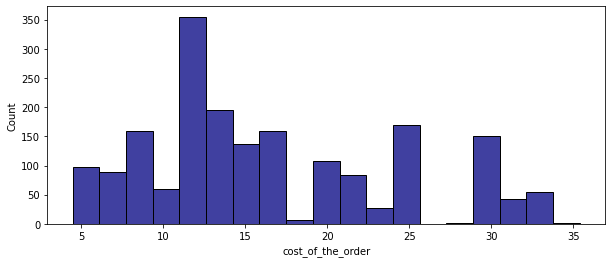

In [ ]:
# plots a histogram of the cost of the various orders for our data set
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='cost_of_the_order', color = 'navy');




#### Observations: A plurality of order costs exists between approximately 11 and 13 dollars. There are little to no orders between the cost of 26 and 29 dollars. The data is skewed to the right indicating the mean is greater than the median for order cost.

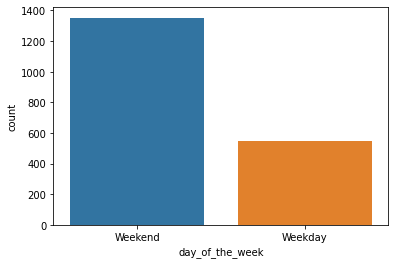

In [ ]:
# plots a bar graph of day of the week
sns.countplot(data=data, x='day_of_the_week');




#### Observations: There are more than twice as many orders on the weekend as the weekday in our data set, which is significant considering the weekend makes up only 2 of the 7 days in the week

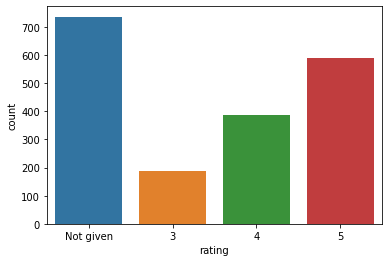

In [ ]:
# plots a bar graph of ratings
sns.countplot(data=data, x='rating', order=['Not given','3','4','5']);




#### Observations: A plurality of ratings exists in the 'Not given' category. Apart from 'Not given', 5 stars is the most common rating, followed by 4 stars, followed by 3 stars.

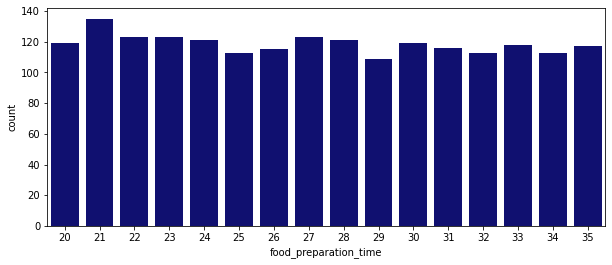

In [ ]:
#plots a bar graph of food preparation time
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='food_preparation_time', color= 'navy');




#### Observations: There exists an approximately uniform distribution of food preparation time

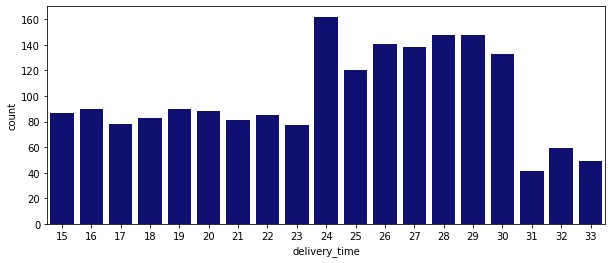

In [ ]:
# plots a bar graph of delivery times
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='delivery_time', color= 'navy');




#### Observations: The delivery time data is slightly skewed to the left indicating the mean delivery time is slightly less than the median delivery time; a large portion of delivery times exists between 24 and 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# returns the top 5 restaurants of orders received
data['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants in terms of number of orders from greatest to least are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# creates a data frame of only orders that occurred on the weekend
data_wknd = data[data['day_of_the_week'] == 'Weekend'].reset_index().copy()

In [ ]:
# returns the value count of various cuisine types on the weekend
data_wknd['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American, Japanese, Italian and Chinese are the most popular cuisine types, respectively


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# returns a summation of orders than cost more than 20 dollars, divides by the number of rows and multiplies by 100
# in order to output the percentage of orders costing more than 20 dollars
(data['cost_of_the_order'] > 20).sum()/(data.shape[0])*100

29.24130663856691

#### Observations: 29.24% of the orders cost greater than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# returns mean delivery time
data['delivery_time'].mean()

24.161749209694417

#### Observations: The mean delivery time is 24.16 minutes or 24 minutes and 10 seconds


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# returns the top 5 most frequent customers
data['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations: The IDs of the top 3 most frequent customers are '52832', '47440' and '83287'


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


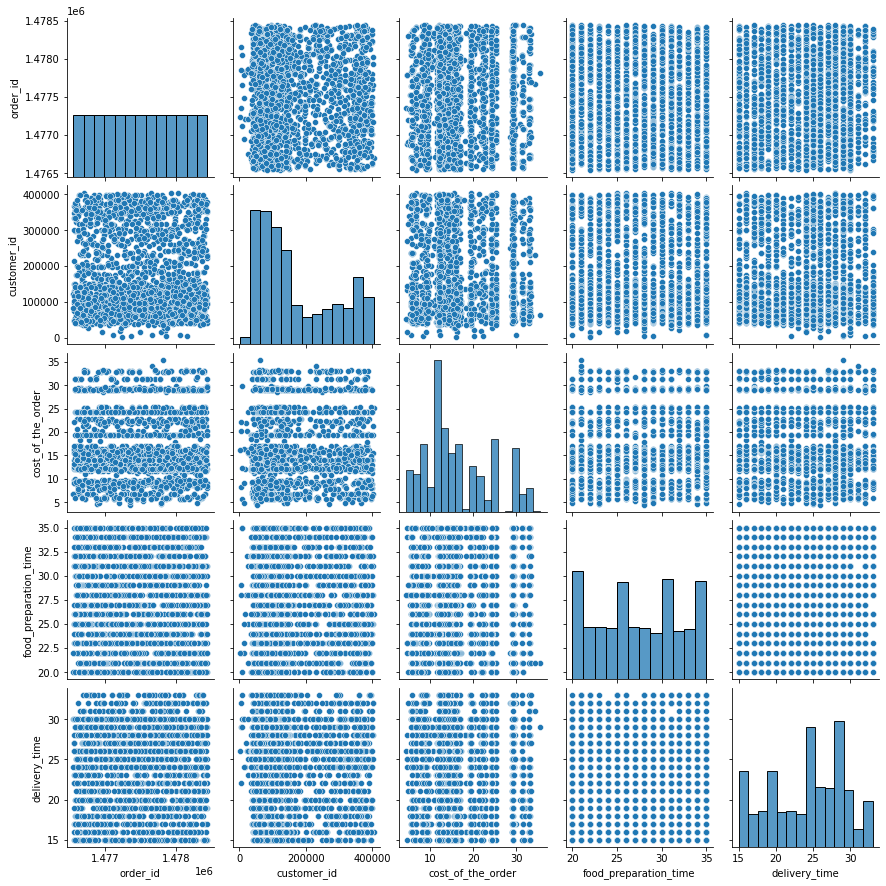

In [ ]:
# plots a pairplot of numerical data
sns.pairplot(data=data);

#### Observations: The graph does not indicate any significant correlation between numerical variables

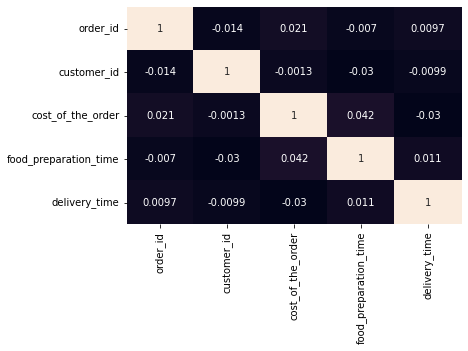

In [ ]:
# plots a heatmap of the numerical data
sns.heatmap(data=data[['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False);

#### Observations: The heatmap does not indicate any significant correlation between numerical variables

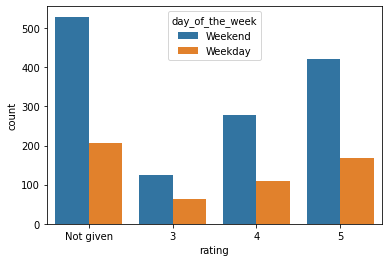

In [ ]:
# plots a bar graph of ratings counts with a 'day of the week' hue
sns.countplot(data=data, x='rating', order=['Not given','3','4','5'], hue ='day_of_the_week');

#### Observations: The bar graph does not indicate that weekend or week day significantly influences rating; the weekend bars are only higher because there were more oders over the weekend. The pattern is the same for both categories.

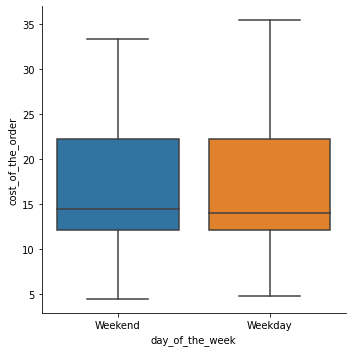

In [ ]:
# plots box plots comparing cost of orders between weekends and weekdays
sns.catplot(data=data, x='day_of_the_week', y = 'cost_of_the_order', kind = 'box');

#### Observations: The maximum cost of weekday orders is higher than that of weekend orders; otherwise, the distributions of cost are very similar.

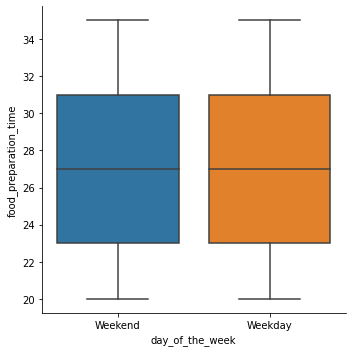

In [ ]:
# plots box plots comparing food preparation time between weekends and weekdays
sns.catplot(data=data, x='day_of_the_week', y = 'food_preparation_time', kind = 'box');

#### Observations: Day of the week does not significantly affect food preparation time

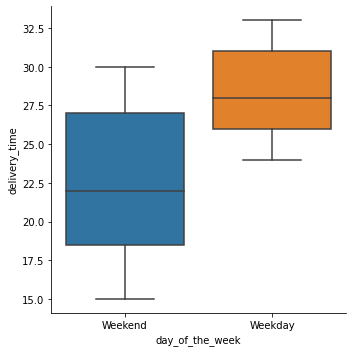

In [ ]:
# plots box plots comparing delivery time between weekends and weekdays
sns.catplot(data=data, x='day_of_the_week', y = 'delivery_time', kind = 'box');

#### Observations: The delivery times on weekdays tend to be significantly greater than the delivery times on weekends; this may be due to traffic during busy commute hours

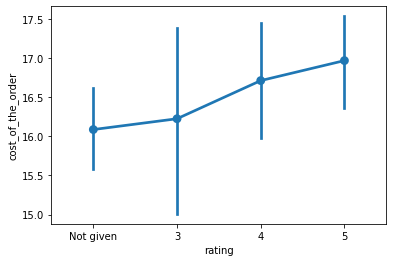

In [ ]:
# plots boxplots comparing costs of the orders between different ratings
sns.pointplot(data=data, x='rating',y='cost_of_the_order', order=['Not given','3','4','5']);


#### Observations: As the cost  of the order increases, the rating of the food tends to increase

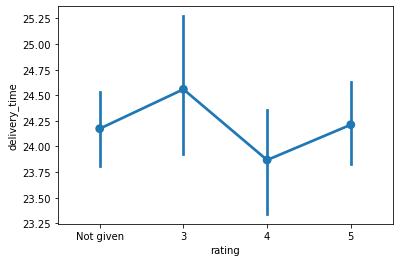

In [ ]:
# plots boxplots comparing delivery times between different ratings
sns.pointplot(data=data, x='rating',y='delivery_time', order=['Not given','3','4','5']);



#### Observations: Delivery time does not significantly affect rating given indicating there is not a significant correlation between delivery time and customer satisfaction

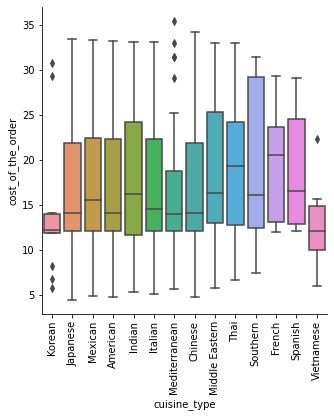

In [ ]:
# plots box plots comparing costs of the orders between different cuisine types
a= sns.catplot(data=data, x='cuisine_type', y = 'cost_of_the_order', kind = 'box');
a.set_xticklabels(rotation=90);

#### Observations: Vietnamese and Korean food tends to be the cheapest with the exception of only 3 outliers of orders costing greater than 20$ for those cuisine types. French food has the highest median cost of order. French and Spanish food have the greatest dollar amount for "minimum cost of food", indicating these cuisines are the least desired if looking for a "cheap meal".  

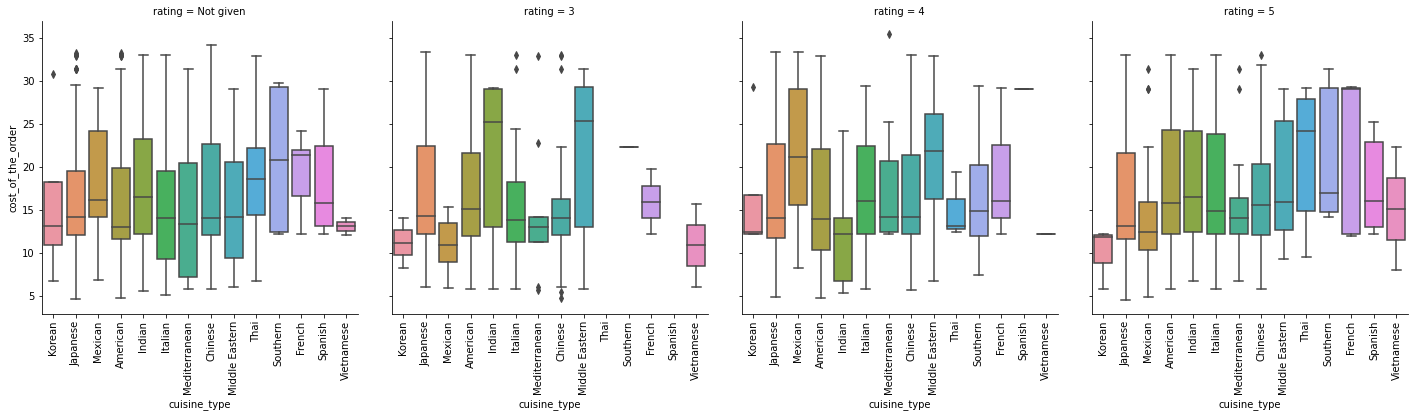

In [ ]:
# plots box plots comparing costs of the orders between different cuisine types separated by ratings
col_order=['Not given','3','4','5']
b = sns.catplot(data=data, x='cuisine_type', y = 'cost_of_the_order', kind = 'box', col='rating', col_order=col_order);
b.set_xticklabels(rotation=90);

#### Observations: The graphs do not appear to significantly vary across different ratings; there are some differences; however, due to the relatively small sample size for some cuisine types, no clear insights can be made

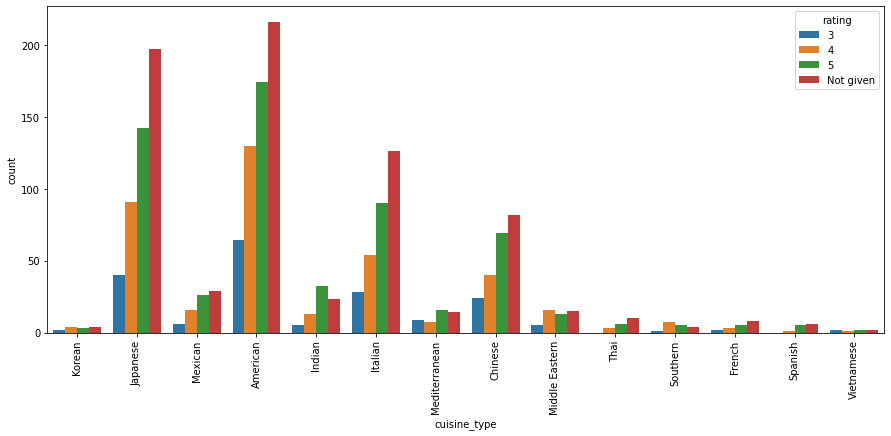

In [ ]:
#plots a bar graph comparings different rating coutns for each cuisine type
plt.figure(figsize=(15,6))
hue_order = [ '3', '4','5','Not given']
sns.countplot(data=data, x='cuisine_type', hue='rating', hue_order=hue_order);
plt.xticks(rotation=90);

#### Observations: Apart from the cuisine types with a small sample size, each major cuisine type tends to follow the rating count pattern of "Not given > 5 > 4 > 3". The potential exceptions to this are Indian and Meditterranean food where the number of 5 star ratings is greater than the number of 'Not given' ratings; perhaps this observation would differ with a larger sample size for these cuisine types as the rating counts for Indian and Meditterranean orders is still relatively small.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# creates a data frame that excludes all orders without a given rating
rated_data = data[data['rating'] != 'Not given'].reset_index().copy()
#returns the first 5 rating values in the data set
rated_data['rating'].head()

0    5
1    3
2    4
3    3
4    3
Name: rating, dtype: object

In [ ]:
#converts the data type of ratings to integers
rated_data['rating'] = rated_data['rating'].astype(int)
#returns the first 5 rating values in the data set
rated_data['rating'].head()

0    5
1    3
2    4
3    3
4    3
Name: rating, dtype: int64

In [ ]:
# returns total rating count for each restaurant
new_data = rated_data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending= False).reset_index().copy()
new_data

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [ ]:
# creates a data frame containing only restaurants with greater than 50 ratings
top_fifty_data = new_data[new_data['rating'] > 50].reset_index().copy()
top_fifty_data

,index,restaurant_name,rating
0,0,Shake Shack,133
1,1,The Meatball Shop,84
2,2,Blue Ribbon Sushi,73
3,3,Blue Ribbon Fried Chicken,64


In [ ]:
# creates a data frame with only restaurants that posess greater than 50 ratings
filtered_rated = rated_data[rated_data['restaurant_name'].isin(top_fifty_data['restaurant_name'])].reset_index().copy()
filtered_rated

,level_0,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
1,8,12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
2,10,15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
3,12,19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
4,14,22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...,...,...
349,1151,1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
350,1153,1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
351,1154,1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
352,1155,1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [ ]:
# returns the mean value for restaurants that each posses greater than 50 ratings
filtered_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False)

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations: There are only 4 restaurants that contain greater than 50 ratings and have an average rating value greater than 4 and they are 'The Meatball Shop', 'Blue Ribbon Fried Chicken' and 'Blue Ribbon Sushi'.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# provides an algorithm to determine revenue generated by each order 
def total_rev(x):
  if x > 20:
    return .25*x
  elif x > 5:
    return .15*x
  else:  
    return None 

In [ ]:
# provides the top first 5 order cost values
data['cost_of_the_order'].head()

0    30.75
1    12.08
2    12.23
3    29.20
4    11.59
Name: cost_of_the_order, dtype: float64

In [ ]:
# confirms that the total_rev function is working as intended
data['cost_of_the_order'].apply(total_rev).head()

0    7.6875
1    1.8120
2    1.8345
3    7.3000
4    1.7385
Name: cost_of_the_order, dtype: float64

In [ ]:
# applies the total_rev function to the cost_of_the_order function and then provides a summation of the values
data['cost_of_the_order'].apply(total_rev).sum()

6166.303

#### Observations: The net revenue generated by the company across all orders is approximately $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Creates a new column containing the the total time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
# returns the percentage of total time values greater than 60 minutes 
(data['total_time'] > 60).sum()/data.shape[0]*100


10.537407797681771

#### Observations: The percentage of oders where the total time required to deliver the food is greater than 60 minutes is approximately 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Returns the mean delivery times for weekdays and weekends 
data_wkdy = data[data['day_of_the_week'] == 'Weekday'].reset_index().copy()
data_wknd = data[data['day_of_the_week'] == 'Weekend'].reset_index().copy()
print('Weekday delivery = ', data_wkdy['delivery_time'].mean())
print('Weekend delivery = ', data_wknd['delivery_time'].mean())

Weekday delivery =  28.340036563071298
Weekend delivery =  22.4700222057735


#### Observations: The average weekday delivery time is approximately 6 minutes greater than weekend delivery time


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American, Japanese, Italian and Chinese food are by far the most popular cuisine types
*The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack    and Blue Ribbon Sushi are by far the most popular restaurants
* There exists a significant number of App users that frequently order food through FoodHub  
* Within this sample size, people who order Indian and Mediterranean food are more likely to give 5 star ratings than leave no rating at all
* Delivery time is significantly greater on weekdays than on weekends
* Delivery time does not appear to significantly affect ratings within our sample

### Recommendations:

*  Consider marketing FoodHub to newer restaurants serving American, Japanese, Italiana and Chinese food which will likely create more revenue for these restaurants and FoodHub
* Consider coupons for the most popular restaurants in order establish a strong a mutual relationship between popular restaurants and FoodHub
*Consider coupons or a rewards system for frequent app users in order to increase liklihood of repeat customers
*Consider marketing specifically to customers that are likely to order Indian/Mediterranean food as they may be more likely to give positive feedback ratings for the food and potentially be more likely to give positive feedback ratings for the App (this is based on the data suggesting that customers of these cuisine types give a disproportionate number of 5 star ratings) 
*Consider an additional delivery charge during busier hours on weekdays in order to offset the additional cost it takes to pay employees for the delivery time
*Because delivery times appear to not significantly affect the food rating, FoodHub can consider expanding the radius within New York to which they are willing to deliver 

---

In [ ]:
!jupyter nbconvert --to html /content/Klussmann_FoodHub_Data_Analysis.ipynb

[NbConvertApp] WARNING | pattern '/content/Klussmann_FoodHub_Data_Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.a